# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [11]:
GroupName = "KraftMacNCheese"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'
KaggleCompetitionLink = "https://www.kaggle.com/competitions/whats-cooking"
assert KaggleCompetitionLink != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import csv
from sklearn.feature_selection import SelectKBest, f_classif, RFE

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

The problem for the What's Cooking? challenge on Kaggle is classifying a grouping of ingredients to be paired with a specific culinary style. We are presented with a list of inredients that are connected to a culinary style. The action of the challenge is that we need to be able to apply machine learning to the ingredients and train the machine to be able to recognize certain groupings of ingredients and identify the culinary style. The dataset comes with 3 features, an ID, a culinary style, and a list of ingredients. The ID is generally used for scoring, the style is used to train the machine and each of the ingredients are features that help identify the specific culinary style.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [14]:
df = pd.read_json("train.json")
df_test = pd.read_json("test.json")

X = df.drop(columns=["cuisine", "id"])
y = df["cuisine"]
test_id = df_test["id"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

                                             ingredients
23436  [shredded cheddar cheese, chicken meat, choppe...
7901   [fresh cilantro, purple onion, ground coriande...
25718  [sugar, garlic, onions, vinegar, green chilies...
16909  [raw pistachios, purple onion, couscous, dried...
34830  [tomatoes, pepper, salsa, sliced green onions,...
...                                                  ...
6265   [tomato purée, butter, salt, taco seasoning, p...
11284  [marsala wine, butter, olive oil, fresh mushro...
38158  [blue crabs, peeled fresh ginger, soy sauce, s...
860    [pepper, spicy brown mustard, boneless chicken...
15795  [olive oil, thyme leaves, dried lavender, lemo...

[31819 rows x 1 columns]
23436        mexican
7901          indian
25718       filipino
16909       moroccan
34830        mexican
            ...     
6265         mexican
11284        italian
38158        chinese
860      southern_us
15795         french
Name: cuisine, Length: 31819, dtype: object


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
3. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
4. Summarize your initial observations about the data. 

<class 'pandas.core.series.Series'>


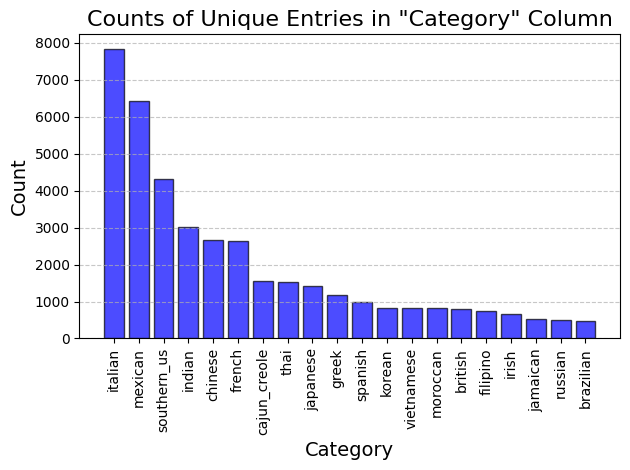

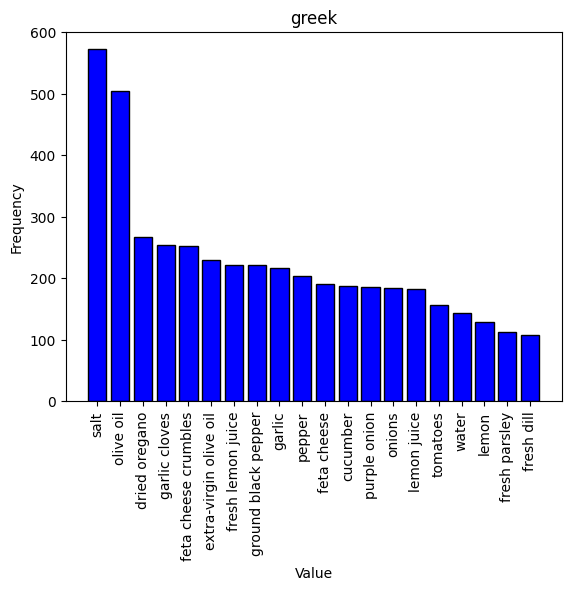

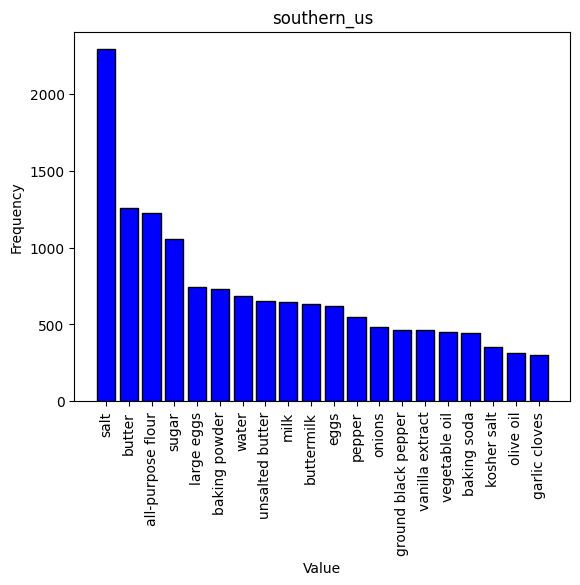

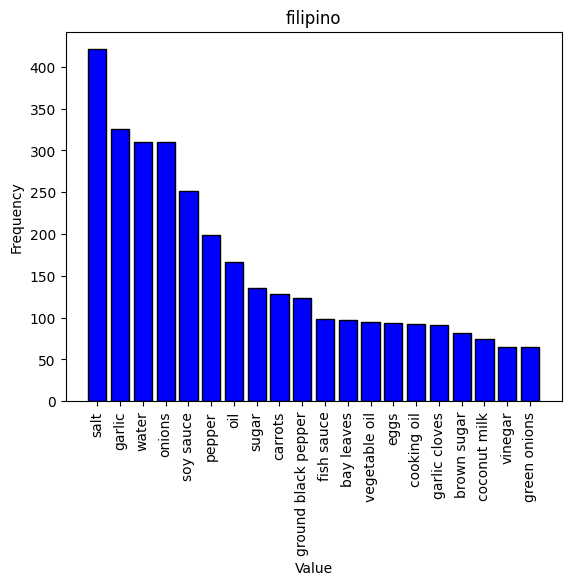

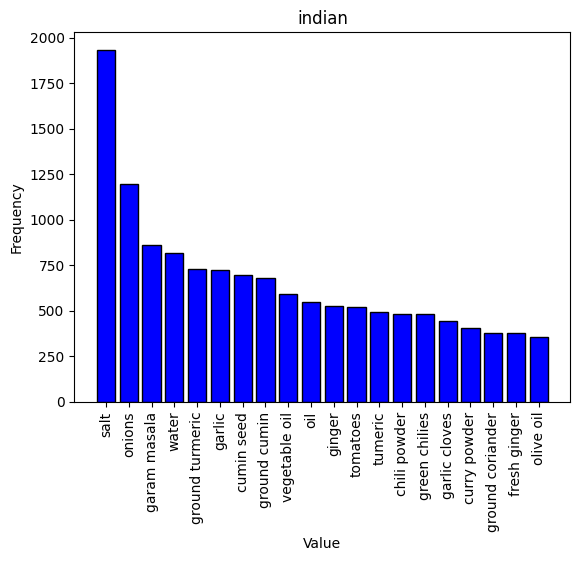

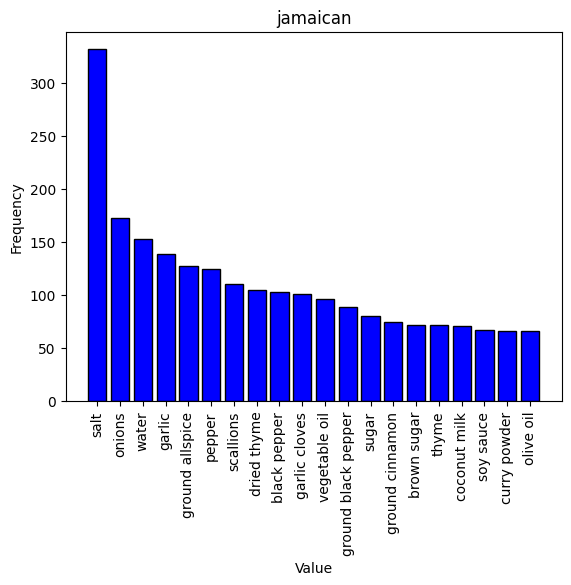

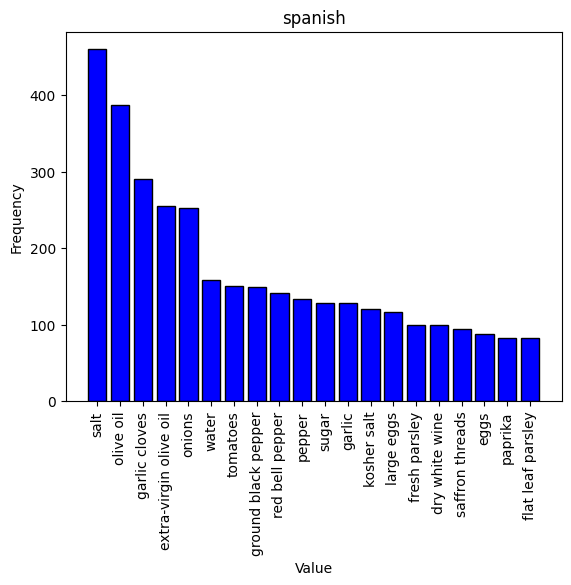

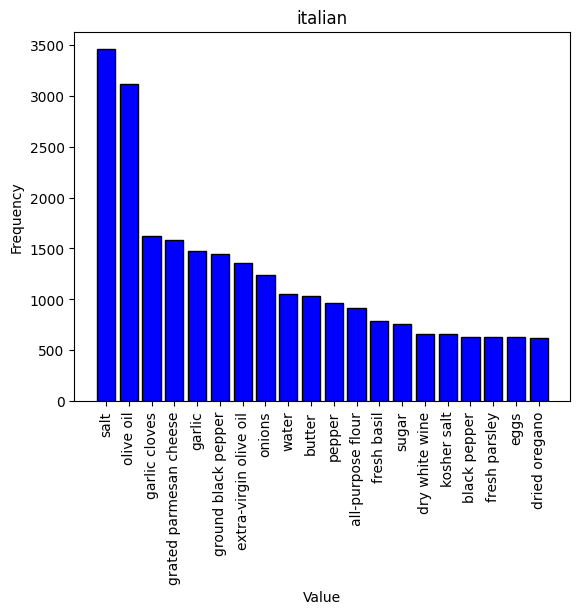

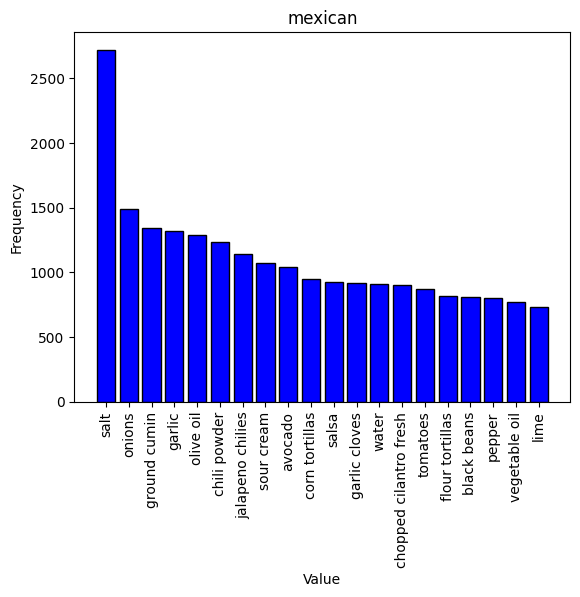

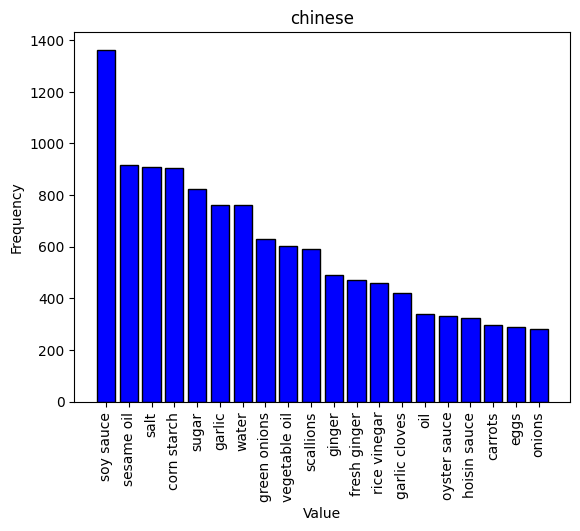

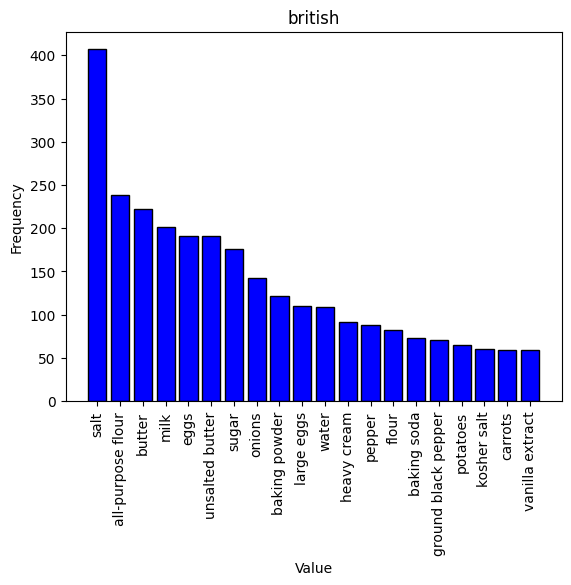

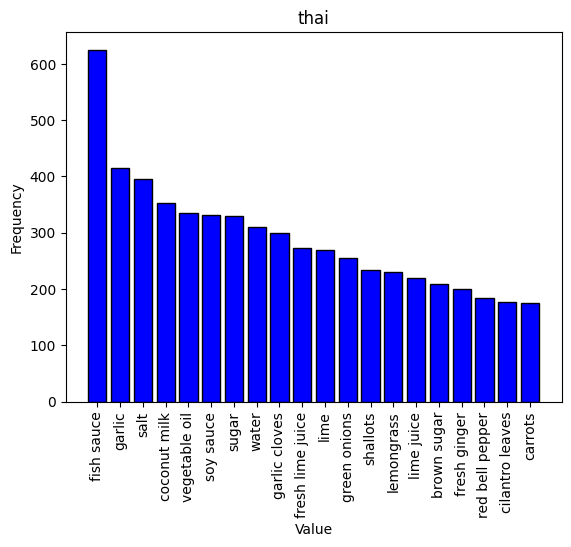

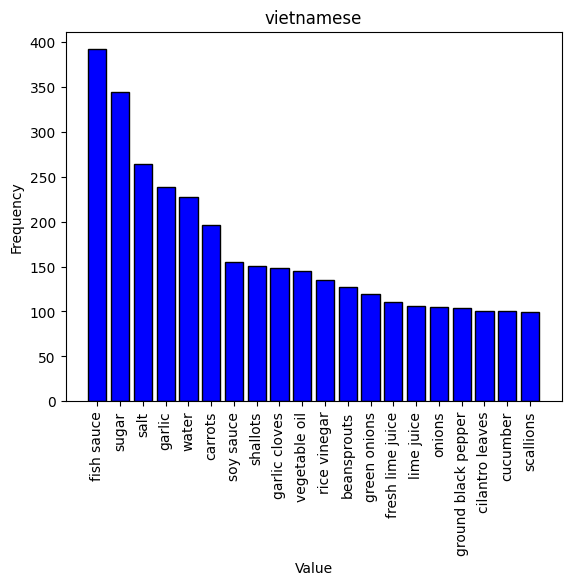

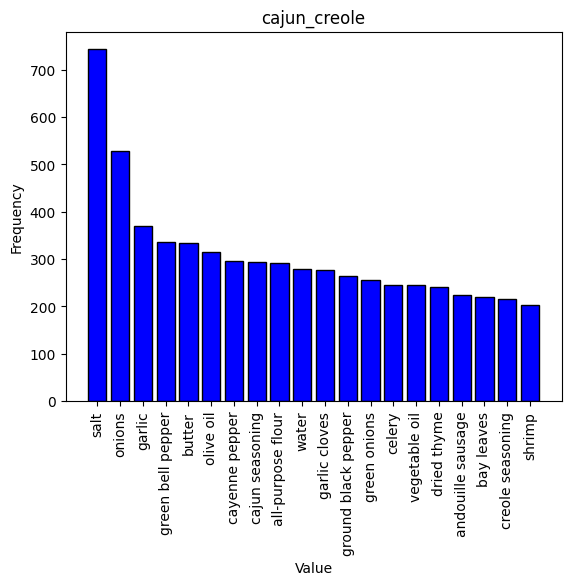

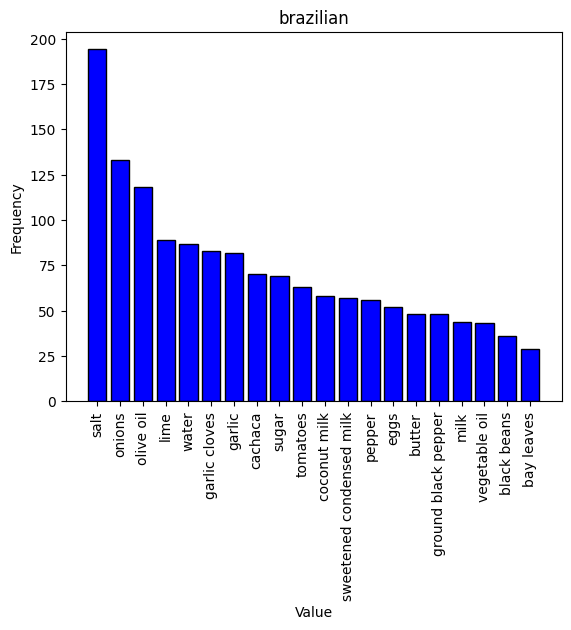

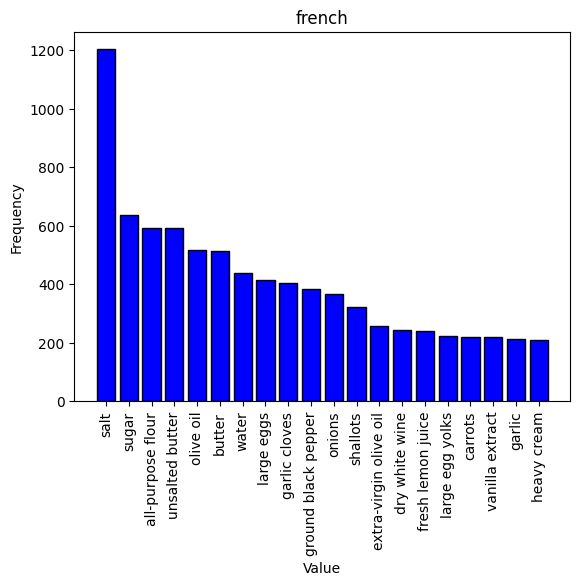

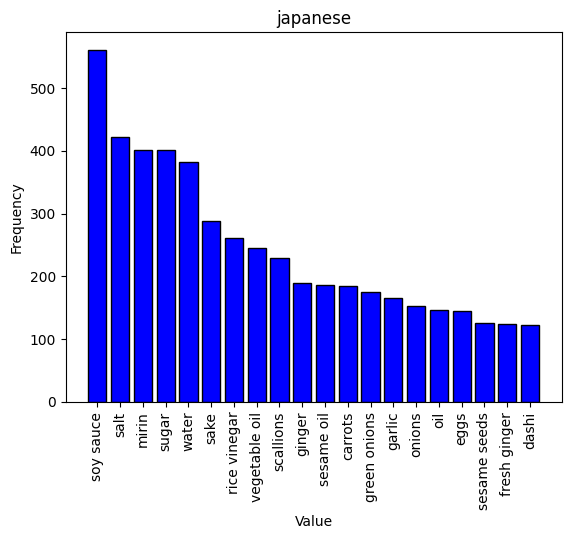

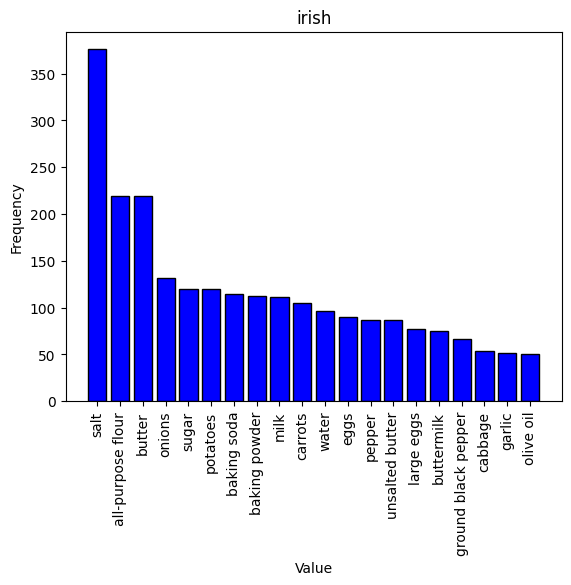

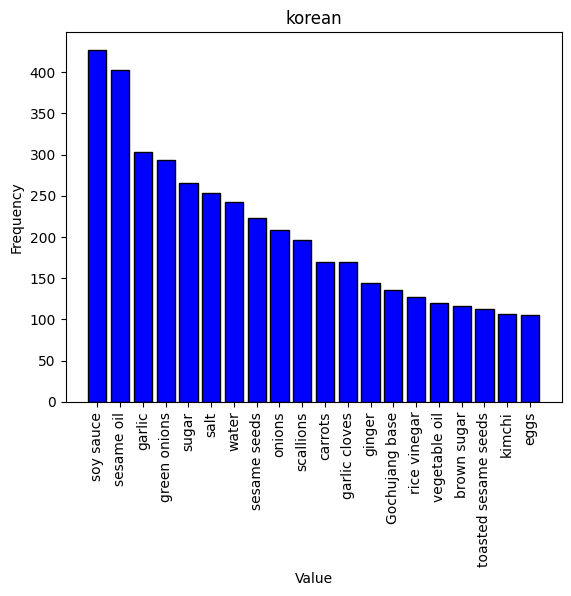

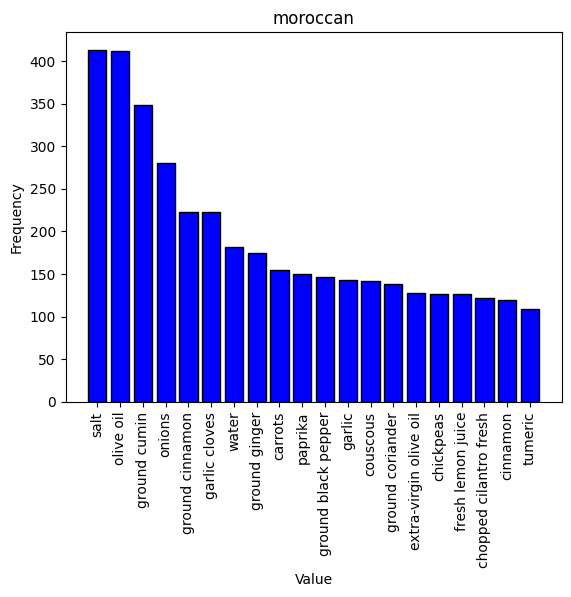

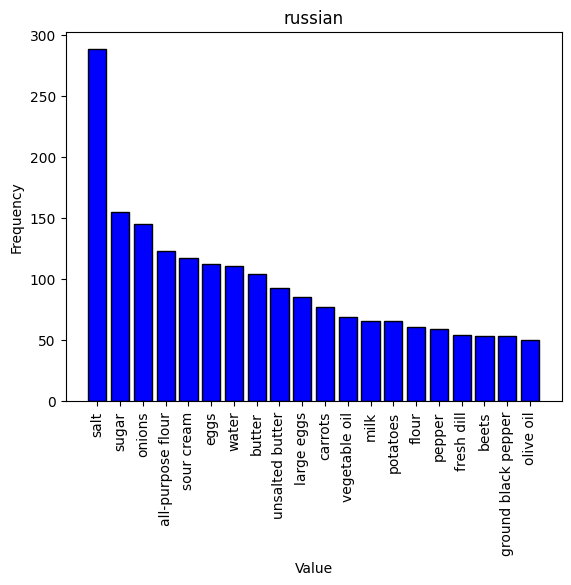

              Average Ingredients  Median Ingredients
cuisine                                              
brazilian                9.520343                 9.0
british                  9.708955                 9.0
cajun_creole            12.617076                12.0
chinese                 11.982791                12.0
filipino                10.000000                10.0
french                   9.817838                 9.0
greek                   10.182128                10.0
indian                  12.705961                12.0
irish                    9.299850                 9.0
italian                  9.909033                10.0
jamaican                12.214829                12.0
japanese                 9.735067                 9.0
korean                  11.284337                11.0
mexican                 10.877446                10.0
moroccan                12.909866                13.0
russian                 10.224949                10.0
southern_us              9.6

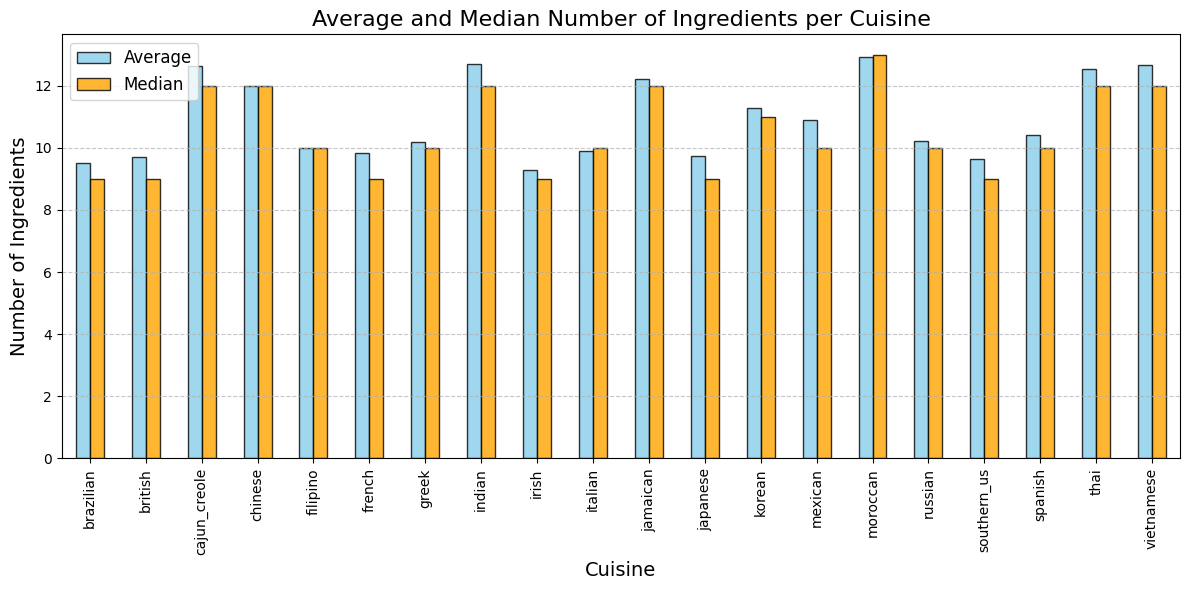

In [15]:
from collections import Counter

unique_counts = y.value_counts()

# Display the counts
print(type(unique_counts))

plt.bar(unique_counts.index, unique_counts.values, color='blue', edgecolor='black', alpha=0.7)

# Add labels, title, and grid
plt.title('Counts of Unique Entries in "Category" Column', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def plot_ingredient_distribution(df):
    """
    Plots the ingredient distribution for each cuisine.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - ingredient_column (str): Name of the column with ingredient lists.
    - cuisine_column (str): Name of the column with cuisine types.
    """

    totals = {}

    for index, row in df.iterrows():
        # print(row["cuisine"])
        if row["cuisine"] not in totals:
            totals[row["cuisine"]] = row["ingredients"]
        else:
            totals[row["cuisine"]] = totals[row["cuisine"]] + row["ingredients"]

    for key, value in totals.items():
        counter = Counter(value)

        # Get the 10 most common values (value, frequency) pairs
        most_common = counter.most_common(20)
        
        # Separate the values and their counts
        values, counts = zip(*most_common)
        
        # Plot the histogram of the top 10 most frequent values
        plt.bar(values, counts, color='blue', edgecolor='black')
        
        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(key)
        plt.xticks(rotation=90)
        
        # Show the plot
        plt.show()


# Plot ingredient distribution for each cuisine
plot_ingredient_distribution(df)

# Calculate the number of ingredients for each recipe
df["num_ingredients"] = df["ingredients"].apply(len)
stats = df.groupby("cuisine")["num_ingredients"].agg(["mean", "median"])
stats.rename(columns={"mean": "Average Ingredients", "median": "Median Ingredients"}, inplace=True)
print(stats)

# Visualize the count
stats.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange"], edgecolor="black", alpha=0.8)
plt.title("Average and Median Number of Ingredients per Cuisine", fontsize=16)
plt.xlabel("Cuisine", fontsize=14)
plt.ylabel("Number of Ingredients", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Average", "Median"], fontsize=12)
plt.tight_layout()
plt.show()

1. We performed data analysis on the training set by getting unique counts and plotting that information
2. Our two summary statistics:
    - The counts of each ingredient for each cuisine is counted and displayed in a bar graph to highlight the 20 most common ingredients for our data set. This allows us to be able to drop columns that are common between all cuisines and to focus on the details that we find the most important.
    - The average number of ingredients for each cuisine was counted and also represented as a bar graph. This graph shows us which cuisines utilize more ingredients which helps us identify that if a dish were to be tested and have a lot of ingredients we could utilize that to identify what the cuisine is.
3. Our inital observations are that each cuisine have unique ingredients that are prominent in their dishes. But that they also have some shared ingredients such as salt. By looking at this information we can drop salt from the list of ingredients because it is shared between everything. We were also able to observe that their are a lot more entries for italian, and mexican food than other cultures and that our data will be swayed towards those options. It is necessary to make sure our models can successfully pick out the different ingredients for each cuisine so that it is not all return as italian and mexican. We also learned that most cuisines utilize similar amounts of ingredients and that the number of ingredients may not be a valuable attribute to help determine the cuisine for the list of ingredients.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

In [16]:
ingredient_mapping = {
    # Milk and Dairy Variants
    "whole milk": "milk",
    "skim milk": "milk",
    "2% milk": "milk",
    "condensed milk": "milk",
    "evaporated milk": "milk",
    "cream cheese": "cheese",
    "cheddar cheese": "cheese",
    "parmesan cheese": "cheese",
    "mozzarella cheese": "cheese",
    "feta cheese": "cheese",
    "yogurt": "yogurt",
    "plain yogurt": "yogurt",
    "greek yogurt": "yogurt",

    # Butter Variants
    "unsalted butter": "butter",
    "salted butter": "butter",
    "butter oil": "butter",
    "margarine": "butter",

    # Tomato Sauce and Related Variants
    "tomato paste": "tomato sauce",
    "marinara sauce": "tomato sauce",
    "pasta sauce": "tomato sauce",
    "tomato sauce": "tomato sauce",
    "crushed tomatoes": "tomato",
    "diced tomatoes": "tomato",
    "plum tomatoes": "tomato",

    # Sugar Variants
    "white sugar": "sugar",
    "brown sugar": "sugar",
    "granulated sugar": "sugar",
    "confectioners sugar": "sugar",
    "powdered sugar": "sugar",
    "dark brown sugar": "sugar",

    # Oil Variants
    "extra-virgin olive oil": "olive oil",
    "vegetable oil": "oil",
    "canola oil": "oil",
    "peanut oil": "oil",
    "sesame oil": "oil",
    
    # Flour Variants
    "all-purpose flour": "flour",
    "self rising flour": "flour",
    "cake flour": "flour",
    "bread flour": "flour",

    # Vinegar Variants
    "rice vinegar": "vinegar",
    "apple cider vinegar": "vinegar",
    "white vinegar": "vinegar",
    "balsamic vinegar": "vinegar",
    "red wine vinegar": "vinegar",
    
    # Soy Sauce Variants
    "low sodium soy sauce": "soy sauce",
    "light soy sauce": "soy sauce",
    "dark soy sauce": "soy sauce",
}

# Function to map ingredients in each recipe to broader categories
def map_ingredients(ingredients):
    return [ingredient_mapping.get(ing, ing) for ing in ingredients]

# Apply the mapping to the ingredients columns
X_train['ingredients'] = X_train['ingredients'].apply(map_ingredients)
X_test['ingredients'] = X_test['ingredients'].apply(map_ingredients)

X_train

,ingredients
23436,"[shredded cheddar cheese, chicken meat, choppe..."
7901,"[fresh cilantro, purple onion, ground coriande..."
25718,"[sugar, garlic, onions, vinegar, green chilies..."
16909,"[raw pistachios, purple onion, couscous, dried..."
34830,"[tomatoes, pepper, salsa, sliced green onions,..."
...,...
6265,"[tomato purée, butter, salt, taco seasoning, p..."
11284,"[marsala wine, butter, olive oil, fresh mushro..."
38158,"[blue crabs, peeled fresh ginger, soy sauce, s..."
860,"[pepper, spicy brown mustard, boneless chicken..."


Here for our feature engineering we combined some of the ingredients we had to simplify the model learning process. After originally running the project we realized that there were too many ingredients for out models to run quickly and it also lead to the model being overfit to certain kinds of styles of the same thing for a specific culture when in reality that dosen't affect what would be the deciding factor for a specific cuisine. By combining some of these ingredients we were able to successfully raise our accuracy of our final model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [19]:
mlb = MultiLabelBinarizer(sparse_output=True)

def remove_salt(ingredients):
    return [ingredient for ingredient in ingredients if ingredient != 'salt']

# Apply the function to the ingredients column
X_train['ingredients'] = X_train['ingredients'].apply(remove_salt)
X_test['ingredients'] = X_test['ingredients'].apply(remove_salt)

X_train_ingredients = mlb.fit_transform(X_train['ingredients'])
X_test_ingredients = mlb.transform(X_test['ingredients'])

dense_matrix_from_sparse = X_train_ingredients.toarray()

# Convert the dense matrix to a Pandas DataFrame
df = pd.DataFrame(dense_matrix_from_sparse)

# Print the regular Pandas DataFrame
print(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['Alexia Waffle Fries', 'BACARDI® Mixers Margarita Mix', 'BACARDI® Superior', "BREAKSTONE'S Sour Cream", 'Better Than Bouillon Chicken Base', 'Bragg Liquid Aminos', 'Crystal Farms Reduced Fat Shredded Marble Jack Cheese', 'Crystal Farms Shredded Gouda Cheese', 'DeLallo Penne Ziti', 'Elmlea Single Light', 'Elmlea single', 'Fisher Pecan Halves', 'Flora Buttery', 'Flora pro.activ', 'Greek black olives', 'Hidden Valley® Greek Yogurt Original Ranch® Dip Mix', 'JOHNSONVILLE Hot & Spicy Sausage Slices', 'Jell-O Gelatin Dessert', 'Jif Creamy Peanut Butter', 'Jimmy Dean All Natural Regular Pork Sausage', 'KNUDSEN 2% Milkfat Low Fat Cottage Cheese', 'KRAFT Mexican Style Shredded Four Cheese with a TOUCH OF PHILADELPHIA', 'KRAFT Reduced Fat Shredded Mozzarella Cheese', 'KRAFT Shredded Mozzarella Cheese', 'Knorr® Pasta Sides™ - Butter & Herb', 'Mae Plo

       0     1     2     3     4     5     6     7     8     9     ...  6250  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
31814     0     0     0     0     0     0     0     0     0     0  ...     0   
31815     0     0     0     0     0     0     0     0     0     0  ...     0   
31816     0     0     0     0     0     0     0     0     0     0  ...     0   
31817     0     0     0     0     0     0     0     0     0     0  ...     0   
31818     0     0     0     0     0     0     0     0     0     0  ...     0   

       6251  6252  6253  6254  6255  62

Here we were able to do our pre-processing, after looking and realizing that salt wasn't a column that would help distinguish between certain cuisines we decided to drop the column. We then set up and applied a multi label binarizer. This allowed us to apply one hot enncoding to each individual ingredient and split our list of ingredients into individual columns so the models could utilize them to successfully predict the cuisines.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [20]:
baseline_model = DummyClassifier(random_state=42)

baseline_model.fit(X_train_ingredients, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(baseline_model, X_train_ingredients, y_train, cv=10, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

Decision Tree Accuracy: 0.19708350433148103
test Accuracy:  0.19698302954116909


Here we tried the Dummy classifier and it did not give us a very accurate prediction. Just .2, this shows that it is doing slightly better than just randomly guessing a cusiine from the list of 20 potential cuisines.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [23]:
complexity_params = [0.1, 1, 10]

# Iterate over each complexity parameter
for c in complexity_params:
    # Set up the logistic regression model with the current complexity parameter
    linear_model = LogisticRegression(C=c, max_iter=1000, random_state=42)
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(linear_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')
    
    # Print the results for the current complexity parameter
    print(f"C = {c}")
    print(f"Cross-Validation Mean Accuracy: {scores.mean():.4f}")
    print(f"Cross-Validation Standard Deviation: {scores.std():.4f}\n")



C = 0.1
Cross-Validation Mean Accuracy: 0.7359
Cross-Validation Standard Deviation: 0.0043

C = 1
Cross-Validation Mean Accuracy: 0.7663
Cross-Validation Standard Deviation: 0.0034

C = 10
Cross-Validation Mean Accuracy: 0.7493
Cross-Validation Standard Deviation: 0.0027



By itterating through a handful of different C scores we were able to see that the C score of 1 had the highest accuracy and an acceptable standard deviation of the 3 so we are going to stick with that for our Linear Regression Model.

In [24]:
linear_model = LogisticRegression(C=1, max_iter=1000, random_state=42)

# Fit the model to the training data
linear_model.fit(X_train_ingredients, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(linear_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

Decision Tree Accuracy: 0.7663345543497513
test Accuracy:  0.7807668133249529


After looking at our C scores we determine that the value 1 for C for our LogisticRegression would be best so we stuck with that and got the cross-validation accuracy of ~0.766 and a test accuracy of ~0.781, showing promise for this approach.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [32]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter optimization

dt_model.fit(X_train_ingredients, y_train)

y_pred = dt_model.predict(X_test_ingredients)

# Evaluate the model
cv_results = cross_validate(
    dt_model,
    X_train_ingredients,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    return_estimator=False,
)

print(f"Decision Tree Cross-Validation Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Cross-Validation Fit Time (mean): {cv_results['fit_time'].mean():.4f} seconds")
print(f"Cross-Validation Score Time (mean): {cv_results['score_time'].mean():.4f} seconds")
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

Decision Tree Cross-Validation Accuracy: 0.5994
Cross-Validation Fit Time (mean): 4.0498 seconds
Cross-Validation Score Time (mean): 0.0158 seconds
test Accuracy:  0.6087994971715902


The Decision Tree Classifier Model gave us a cross-validation accuracy score of ~.599 and a test accuracy of ~.609. This would not be a very effective model as it underfits everything and can't get us consistent or good results. Although it did run quickly of fitting and scoring.

In [34]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_ingredients, y_train)

y_pred = rf_model.predict(X_test_ingredients)

# Evaluate the model
cv_results = cross_validate(
    rf_model,
    X_train_ingredients,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=False
)
print(f"Random Forest Cross-Validation Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Cross-Validation Fit Time (mean): {cv_results['fit_time'].mean():.4f} seconds")
print(f"Cross-Validation Score Time (mean): {cv_results['score_time'].mean():.4f} seconds")
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

Random Forest Cross-Validation Accuracy: 0.7048
Cross-Validation Fit Time (mean): 53.2058 seconds
Cross-Validation Score Time (mean): 0.7198 seconds
test Accuracy:  0.7146448774355751


The Random Forest Classifier Model gave us a cross-validation accuracy score of ~.705 and a test accuracy of ~.715. This helps us to see that this model works more effectively than that of the decision tree classifier. It did take somewhat longer since the fit and score times were a bit longer but we got more accurate results. We would conclude that this is a more acceptable option of a model to use since its accuracy was higher for the test accuracy which helps confirm that this model is not as underfit.

In [31]:
# K Nearest Neighbors

knn_model = KNeighborsClassifier()

knn_model.fit(X_train_ingredients, y_train)

y_pred = knn_model.predict(X_test_ingredients)

# Evaluate the model
cv_results = cross_validate(
    knn_model,
    X_train_ingredients,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=False  # Optional: Include training scores if needed
)
print(f"K Nearest Neighbors Cross-Validation Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Cross-Validation Fit Time (mean): {cv_results['fit_time'].mean():.4f} seconds")
print(f"Cross-Validation Score Time (mean): {cv_results['score_time'].mean():.4f} seconds")
accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

K Nearest Neighbors Cross-Validation Accuracy: 0.4871
Cross-Validation Fit Time (mean): 0.0506 seconds
Cross-Validation Score Time (mean): 5.7172 seconds
test Accuracy:  0.5020741671904463


The K Nearest Neighbors Model gave us a cross-validation accuracy score of ~.487 and a test accuracy of ~.502. Unlike the models above this score and test time were much faster than the average and did not take much time at all. This made it so it's decision tree accuracy was actually pretty good but the test accuracy of it was much lower giving us a poor performance. This can be attributed to under-fitting which lead to poor performance all around.

In [ ]:
# XGBoost
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_ingredients, y_train_encoded)

y_pred = xgb_model.predict(X_test_ingredients)


# Evaluate the model

cv_results = cross_validate(
    xgb_model,
    X_train_ingredients,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=False  # Optional: Include training scores if needed
)


# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XG Boost Cross-Validation Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Cross-Validation Fit Time (mean): {cv_results['fit_time'].mean():.4f} seconds")
print(f"Cross-Validation Score Time (mean): {cv_results['score_time'].mean():.4f} seconds")
print("XGB Accuracy (Logistic Regression):", accuracy)

NameError: name 'XGBClassifier' is not defined

The XG Boost Model gave us a cross-validation accuracy score of ~.___ and a test accuracy of ~.___. SUMMARY

In [ ]:
#Cat Boost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [100, 200, 500],           # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (step size shrinkage)
    'depth': [3, 5, 7],                      # Maximum tree depth
    'l2_leaf_reg': [1, 3, 5],                # L2 regularization coefficient
    'bagging_temperature': [0, 1, 3],        # Strength of the sampling
}

# Perform GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

cv_results = cross_validate(
    best_model,
    X_train_ingredients,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=False  # Optional: Include training scores if needed
)

y_pred = best_model.predict(X_test_ingredients)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Cross-Validation Accuracy: {cv_results['test_score'].mean():.4f}")
print(f"Cross-Validation Fit Time (mean): {cv_results['fit_time'].mean():.4f} seconds")
print(f"Cross-Validation Score Time (mean): {cv_results['score_time'].mean():.4f} seconds")
print("catboost Accuracy (Logistic Regression):", accuracy)

NameError: name 'CatBoostClassifier' is not defined

The Cat Boost Model gave us a cross-validation accuracy score of ~.___ and a test accuracy of ~.___. SUMMARY

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

In [ ]:
# Select K Best features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_ingredients, y_train)
X_test_selected = selector.transform(X_test_ingredients)

model = LogisticRegression(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after feature selection:", accuracy)

Accuracy after feature selection: 0.35348837209302325


In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_ingredients, y_train)
selected_feature_indices = np.where(model.coef_ != 0)

# Get the selected feature names (this will give a tuple, so we need to extract the first element)
selected_features = np.array(mlb.classes_)[selected_feature_indices[1]]

print("Selected features using L1 regularization:", selected_features)

# Now, select the relevant features from the original data
X_train_selected = X_train_ingredients[:, selected_feature_indices[1]]
X_test_selected = X_test_ingredients[:, selected_feature_indices[1]]

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with selected features:", accuracy)

Selected features using L1 regularization: ['Italian parsley leaves' 'Mexican oregano' 'Thai fish sauce' ...
 'yellow onion' 'yogurt' 'zucchini']
Test Accuracy with selected features: 0.7763670647391577


Working on feature selection we were able to try out two potential options. One was using SelectKBest which dramatically lowered the accuracy score of our predictions. So our team is going to avoid using that. Meanwhile, while doing L1 regularization we were able to find some slight improvments and will likely include this in our final submission!

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [ ]:
log_model = LogisticRegression()

param_grid = [
    {'C' : np.logspace(-4,4,10),
    'solver': ['liblinear','saga'],
    'max_iter'  : [1000,2500,5000]
}
]
clf = GridSearchCV(log_model,param_grid = param_grid, cv = 3, verbose=3,n_jobs=-1)
best_clf = clf.fit(X_train_ingredients, y_train)
best_clf.best_estimator_

print(f'Accuracy - : {best_clf.score(X_train_ingredients, y_train):.3f}')

In [8]:
log_model = LogisticRegression(C=2.782559402207126, max_iter=1000, solver='liblinear')
log_model.fit(X_train_ingredients, y_train)


print(f'Accuracy - : {log_model.score(X_train_ingredients, y_train):.3f}')

Accuracy - : 0.900


In [ ]:
y_pred = log_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(log_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees in the forest
    'max_depth': [1, 10, 20, 30],            # Maximum depth of the trees
}

# Perform GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_ingredients, y_train)
rf_model.fit(X_train_ingredients, y_train)

# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_ingredients)

# Evaluate the model
scores = cross_val_score(best_model, X_train_ingredients, y_train, cv=5, scoring='accuracy')

print("Decision Tree Accuracy:", scores.mean())

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy: ", accuracy)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [ ]:
# import shap
# # Shap Explainer for Decision Tree
# explainer = shap.TreeExplainer(dt_model)

# shap_values = explainer.shap_values(X_train_ingredients)

# shap.summary_plot(shap_values[1], X_train_ingredients) 


We wanted to try this on our Decision Tree Classifier Model that is not one of our Linear Models. Originally we tried to use the shap but due to the version of numpy on all of our computers we could not effectively get this to run. Hence, we tried it using the next best that we could which was through the built in feature_importances_ in the decision tree classifier model.

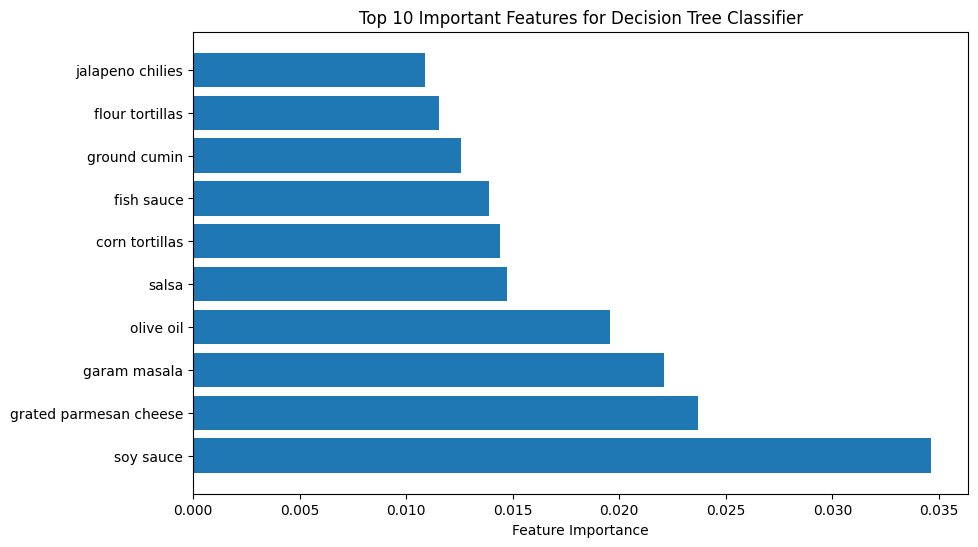

In [65]:
# Get the feature importances from the decision tree model
feature_importances = dt_model.feature_importances_
ingredient_names = mlb.classes_

# Get only the top 10 most important
top_n = 10
sorted_indices = np.argsort(feature_importances)[::-1][:top_n]
top_ingredient_names = ingredient_names[sorted_indices]
top_feature_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align="center")
plt.yticks(range(top_n), top_ingredient_names)
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Decision Tree Classifier")
plt.show()


By doing it this way, we were able to determine what the most important features were for our model and how they can utilize these ingredients to best select the cuisine that they get paired to. We observed that ingredients such as soy sauce, parmesan cheese, masala, olive oil, etc. were directly linked to some cuisines and helped identify them easier.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [66]:
linear_model = LogisticRegression(C=1, max_iter=1000, random_state=42)
linear_model.fit(X_train_ingredients, y_train)
y_pred = linear_model.predict(X_test_ingredients)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7808


1. Our best and most consistant model was our standard LogisticRegression model. Here we can see that the test accuracy is ~.7808. By setting up this Logisitic Regression utilizing the data that we already have the pre-processing done for we have been able to achieve our best results.
2. I would say that our test scores do agree with our results from before because our Cross Validation results were averaging about .766 and this is slightly higher than that result. This model also performed very well in our submission on Kaggle getting us a return accuracy in the upper-70's!

In [84]:
# Reshape the tests into 2D so it isn't compressed
test_samples = [X_test_ingredients[i].reshape(1, -1) for i in range(2)]
predictions = [linear_model.predict(sample) for sample in test_samples]
ingredient_names = mlb.classes_

# Print predictions and true labels for the first 2 test samples
for i in range(2):
    print(f"Prediction for instance {i}: {predictions[i]}")
    true_label = y_test.iloc[i]
    print(f"True label for instance {i}: {true_label}")

    non_zero_indices = X_test_ingredients[i].nonzero()[1]
    ingredient_names_for_sample = ingredient_names[non_zero_indices]
    print("Ingredients for the sample:", ingredient_names_for_sample)
    print()



Prediction for instance 0: ['chinese']
True label for instance 0: chinese
Ingredients for the sample: ['corn starch' 'ground black pepper' 'chinese rice wine' 'soy sauce'
 'cooking oil' 'chinese black mushrooms' 'pork' 'napa cabbage' 'sugar'
 'chicken broth' 'rice cakes' 'bamboo shoots']

Prediction for instance 1: ['spanish']
True label for instance 1: spanish
Ingredients for the sample: ['hungarian paprika' 'ground black pepper' 'dry red wine' 'fatback'
 'olive oil' 'rioja' 'ancho powder' 'pork shoulder butt' 'spanish paprika'
 'smoked sweet Spanish paprika' 'kosher salt' 'hog casings'
 'minced garlic']



Since we cannot run SHAM on our computers we have two of our first entries of the prediction versus what the actual Test label is for it.

We can see that our predictions are running correctly and are locating individual ingredients inside of each sample to specify what the cuisine is. We can see that this is accurate for the first two entries and would find something similar for the rest of them!

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

In [ ]:
# # Your code here
# from sklearn.metrics import accuracy_score

# results = xgb_model.predict(X_test_ingredients)
# results_df = pd.DataFrame({
#     'cuisine': results.
# })
# data = test_id.to_frame()
# data['cuisine'] = results_df['cuisine']
# print(data)

In [ ]:
filename = 'submission.csv'

data.to_csv(filename, index=False)

_Place the Kaggle screenshot here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

Our biggest takeaway from the supervised machine learning material that we have learned would be that of the importance of trying lots of things. Before starting on this project we all had assumptions that it would be there is one best way to try something, independent of the dataset or data that we have. We can now see that this is not the case. Going through these exercises throughout the semester has helped us identify the pros and cons of going about machine learning in different ways.

We also came into the class with the assumption that we could plug in our data to a model and it would be easily trained without need to tweak or change anything on our end. After going through all of these exercises throughout the semester it has been made clear that there is so much that you can do to enhance your machines learning and that you never can truly have a perfect model.

For this project specifically it was made clear that we needed to find ways to lessen the amount of ingredients that we have and to put to the front the most important and identifiable ingredients. Tuning our hyperparameters and pre-processing was quite the adventure to make sure that our model was in the best state that it could be in.

We also learned about managing and dealing with messey data. For our example of What's Cooking? we were able to see that some cultures use the same ingredients but that one culture uses those ingredients more often which lead to some of our mis-classification of data. Given some more time we would go through the data and clean that informatino up by limiting ingredients.

Given that we had more time on this project we would continue with some more hyperparameter tweeking as we were not able to spend a ton of time on that. We believe that if we could do this along with some more ingredient filtering that our models performance would be enhanced and that it could nearly predict all of the cuisines perfectly.

<!-- END QUESTION -->

<br><br>